In [36]:
!pip install --upgrade diffusers transformers -q

In [37]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np

In [38]:
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

In [39]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400,400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [40]:

image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    variant='fp16',
)
image_gen_model = image_gen_model.to(CFG.device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

# Image Generator

In [41]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    
    image = image.resize(CFG.image_gen_size)
    return image

# Image Prompt

  0%|          | 0/35 [00:00<?, ?it/s]

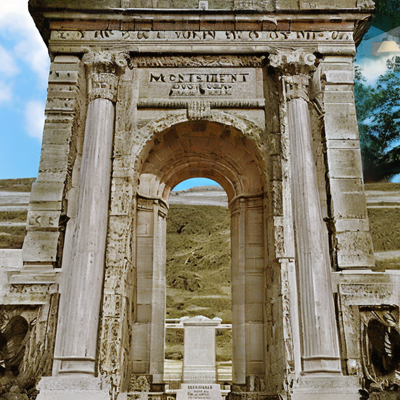

In [63]:
generate_image("monuments", image_gen_model)
